In [1]:
# Si des questions: email: carla.joud@univ-rennes.fr

#bibliothèques utilisées: 
import numpy as np  # permet d'effectuer des calculs numériques
import matplotlib.pyplot as plt #permet de produire des graphes

# TP : Intégrale de Lebesgue

#### L'objectif de ce TP est de montrer numériquement que la fonction définie de $\mathbb{R}^{*}$ dans $\mathbb{R}$ par $$ f(x)=\frac{sin(x)}{x} $$ n'est pas intégrable au sens de Lebesgue sur $[0,+ \infty[$. 


#### Cela a été montré en TD théoriquement [ cf. exo 1 du TD ]. On a vu que cette fonction est intégrable au sens de Riemann généralisée sur $[0,+\infty[$ mais n'est pas absolument intégrable sur $[0,+\infty[$.

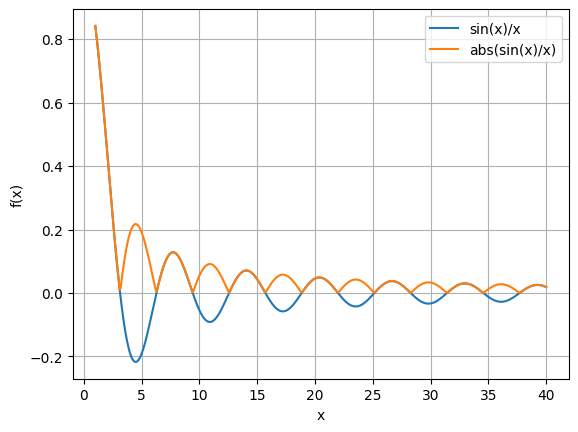

In [2]:
## Graphes des fonctions f(x) et |f(x)|
a=1
b=40
x=np.arange(a,b,(b-a)/499)

fx=np.sin(x)/x
fxabs=np.abs(np.sin(x)/x)

# ---------visu - --------
plt.figure()
plt.figure
plt.plot(x,fx,label='sin(x)/x')
plt.plot(x,fxabs, label='abs(sin(x)/x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

### Partie 1: Méthode d'intégration numérique : **la méthode des rectangles à gauche**

Pour étudier ce résultat numériquement, nous choisirons d'utiliser la méthode des rectangles à gauche.  


1.1) Rappeler le principe de la méthode des rectangles à gauche [voir dans la section du moodle, un pdf est fourni]. Après avoir explicité la méthode, donner la formule de l'intégration d'une fonction $f$ sur un intervalle $[a,b]$ par la méthode des rectangles à gauche. *[Utiliser du LaTeX si nécessaire pour les formules]* 

---------------------------------------------------

La méthode des rectangles à gauche est une méthode d'intégration qui consiste à diviser l'intervalle $[a, b]$ en $n$ sous-intervalles égaux de longueur :  
$$
\Delta x = \frac{b-a}{n}.
$$

Pour chaque sous-intervalle, la hauteur du rectangle est donnée par la valeur de $f$ à l'extrémité gauche du sous-intervalle.


L'approximation de l'intégrale par la méthode des rectangles à gauche est donnée par :  
$$
\int_{a}^{b} f(x) \, dx \approx \Delta x \sum_{i=0}^{n-1} f(a + i \Delta x).
$$

---------------------------------------------------


1.2) Création d'une subdivision de l'intervalle $[a,b]$: pour appliquer notre méthode numérique, il est nécessaire de subdiviser l’intervalle  $[a,b]$. Cela consiste à diviser l’intervalle en plusieurs sous-intervalles de longueurs égales (dans notre cas). 

Objectif :

Rédiger un code permettant de calculer les points de la subdivision si l’on connaît :

$a$ : la borne inférieure de l’intervalle,

$b$ : la borne supérieure de l’intervalle,

$n$ : le nombre de points de la subdivision.

*Remarque importante : Le nombre de sous-intervalles est égal au nombre de points moins 1. La formule du pas $h$ dépend de cette distinction.*

In [3]:
def Subdivision(a,b,n):
    ## Retourne l'ensemble de points de la subdivision et le pas h
    h= (b-a)/(n-1)
    x= np.arange(a,b,h)
    return x,h

1.3) Implémenter une fonction *IntRecG* qui prendra en entrée :

   - un vecteur $f$ contenant plusieurs valeurs de la fonction $f$ que l'on souhaite intégrer; (*Attention: on demande ici un vecteur contenant les valeurs de f à chaque point de la subdivision, rempli  à l'extérieur de la fonction et donc $n$ = len($f$) représente le nombre de points d'une subdivision de l'intervalle d'intégration*);
    
   - un nombre $a$ représentant la borne inférieure de l'intervalle d'intégration;
    
   - un nombre $b$ représentant la borne supérieure de l'intervalle d'intégration.

In [4]:
## Code Python
def IntRecG(f,a,b):
   ''' methode des rectangles a gauche 
   %% a borne inf de l'integrale
   %% b borne sup
   %% f fonction a intégrer
   '''
   sum=0
   x_subdivision, pas_h= Subdivision(a,b,len(f))
   for i in range(0,len(f)):
      sum+= pas_h*f[i]
   return sum

### Partie 2: Mise en pratique sur un exemple -- Étude de la performance de la méthode des rectangles à gauche



Pour cela, on utilisera une fonction dont il est aisé de calculer analytiquement l'intégrale pour pouvoir étudier la performance de la méthode des rectangles à gauche implémemtée, ici : $$ f(x)=\exp(-x) $$ Comme critère de performance, on choisira de calculer l'erreur d'intégration, c'est-à-dire la valeur absolue de la différence entre la valeur théorique de l'intégrale et son estimée.

2.1) Donner la primitive de la fonction f et son code python dans la cellule en-dessous qui calcule la valeur théorique de l'intégrale  pour une valeur de $a$ et de $b$.

$ \int_{a}^{b} f(x) dx= \int_{a}^{b} \exp(-x) dx = [ -\exp(-x) ]_{a}^{b}=\exp(-a)-\exp(-b) $

In [8]:
def Int_th(a,b):
    return np.exp(-a) - np.exp(-b)


2.2) Tester sur un exemple votre code le méthode des rectangles à gauche pour la fonction donnée:

In [9]:
a=0 #borne inf
b=5 #borne sup
n=1000 # Nombre de points
x_subdivision, pas_h= Subdivision(a,b,n)
f_subdiv=np.exp(-x_subdivision) 
#rect a gauche ==> Essayer sur un exemple pour ensuite généraliser par la suite
Int_exp= IntRecG(f_subdiv,a,b)
Int_theo= Int_th(a,b)
# Afficher les valeurs de l'estimation de la valeur de l'intégrale sur l'intervalle et sa valeur théorique
print(f"La valeur de l'estimation de l'intégrale sur [0, {b}[ est : {Int_exp:.5f} tandis que la valeur théorique est : {Int_theo:.5f}")


La valeur de l'estimation de l'intégrale sur [0, 5[ est : 0.99675 tandis que la valeur théorique est : 0.99326


2.3) Étudier la performance de la méthode des rectangles à gauche en fonction de la valeur de n (le nombre de points de la subdivision). 

Afficher l'erreur, définie comme la différence entre la valeur théorique de l'intégrale et son approximation en valeur absolue, en fonction de $n$ 


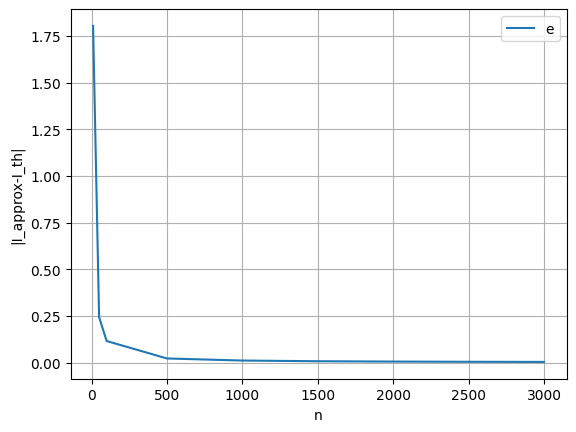

In [10]:
#etude pas subdivision
a=0
b=20
n=np.array([10,50,100,500,1000,1500,2000,2500,3000]) ## les différents nombres de points de la subdivision
erreur=np.zeros(len(n))
h = []

for i,nb in enumerate(n):
    x_subdivision, pas_h= Subdivision(a,b,nb)
    h.append(pas_h)
    f_subdiv=np.exp(-x_subdivision) 
    Int_exp= IntRecG(f_subdiv,a,b)
    Int_theo= Int_th(a,b)
    erreur[i] = np.abs(Int_theo - Int_exp)

plt.figure()
plt.plot(n,erreur)
plt.legend('erreur en fonction du nombre de points de la subdivision')
plt.xlabel('n')
plt.ylabel('|I_approx-I_th|')
plt.grid()
plt.show()




On remarque L'erreur diminue avec l'augmentation du nombre de points de subdivision, comme prévu en théorie.
Cependant, une diminution du pas h au-delà d'un certain seuil n'améliore plus significativement la précision, probablement en raison des limites numériques ou de l'ordre de la méthode.

2.4) Étude de la vitesse de convergence en échelle log-log  

On a vu que pour étudier la vitesse de convergence d'une méthode numérique, on peut représenter la courbe de l’erreur en échelle **log-log**. Une méthode ayant une erreur proportionnelle à \( h^{p} \), avec \( h \) le pas, aura une pente \( p \) sur un graphique log-log. Cela permet une estimation simple de **l’ordre de la méthode**.  

Détails mathématiques  

La relation entre l'erreur et le pas \( h \) est donnée par :  

$$
\text{erreur}(h) = \|u_{\text{th}} - u_{\text{approx}}\| = C h^{p}
$$  

En passant au logarithme des deux côtés de l'équation, on obtient :  

$$
\log(\text{erreur}(h)) = \log(C) + p \log(h)
$$  

Cette équation est une **fonction linéaire** où :  
- \( \log(\text{erreur}(h)) \) est l’ordonnée,  
- \( \log(h) \) est l’abscisse,  
- \( p \) est la pente.  

Tâche  

- Tracez la courbe de \( \log(\text{erreur}) \) en fonction de \( \log(h) \) pour plusieurs valeurs de \( h \).  
- Utilisez la fonction `np.polyfit` pour déterminer la pente \( p \), correspondant à l’ordre de la méthode numérique.  

Aide  

La fonction `np.polyfit` permet d’ajuster une droite aux données \( (x, y) \) et retourne les coefficients de la forme :  

$$
y = m x + b
$$  

où \( m \) est la pente.  


Pente (ordre de la méthode) : 1.0516


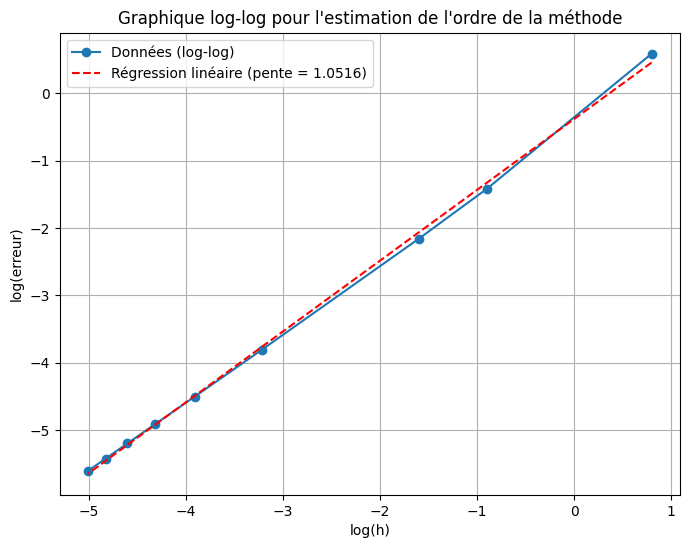

In [11]:
# Calcul des logarithmes
log_h = np.log(h)
log_erreur = np.log(erreur)

# Ajustement linéaire avec np.polyfit
pente, intercept = np.polyfit(log_h, log_erreur, 1)  # voir la doc
# Affichage des résultats
print(f"Pente (ordre de la méthode) : {pente:.4f}")

# Tracé de la courbe log-log et de la droite ajustée
plt.figure(figsize=(8, 6))
plt.plot(log_h, log_erreur, "o-", label="Données (log-log)")
plt.plot(log_h, pente * log_h + intercept, "r--", label=f"Régression linéaire (pente = {pente:.4f})") ## afficher la droite estimée donnée dans l'explication au-dessus
plt.xlabel("log(h)")
plt.ylabel("log(erreur)")
plt.title("Graphique log-log pour l'estimation de l'ordre de la méthode")
plt.grid(True)
plt.legend()
plt.show()


L'ordre de la méthode est donnée par la pente, ici ~1.
Les points de données (bleus) suivent très bien la droite de régression, ce qui montre une bonne cohérence des résultats numériques avec le modèle théorique.

2.5) Choisir la valeur de n la plus adaptée à notre étude et garder ce nombre pour la suite. 

Répondre ici.

2.6) Dans un deuxième temps, étudier la performance de la méthode des rectangles à gauche en fonction de la borne supérieur $b$ de l'intervalle avec la valeur de n fixé précedemment. Afficher le graphique de l'erreur en fonction de b. Commenter

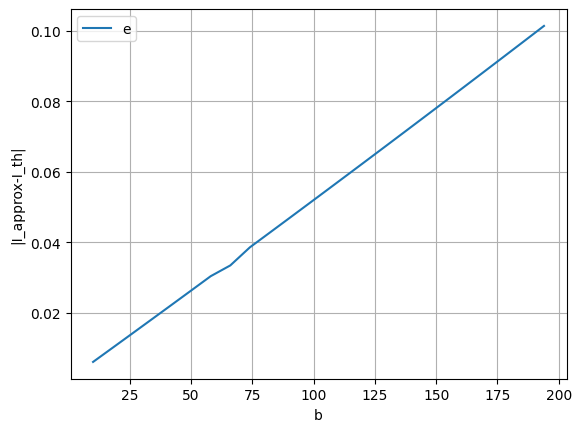

In [12]:
##etude borne inf 
borne_sup=np.array([ 10, 18,  26,  34,  42,  50,  58,  66,  74,  82,  90,  98, 106, 114, 122, 130, 138, 146, 154, 162, 170, 178, 186, 194])
erreur=np.zeros(len(borne_sup)) ## stocker les erreurs
n=1000 ##nbre de points de la subdivision
a=0

for bSup in range(len(borne_sup)):
    b = borne_sup[bSup]
    x_subdivision, pas_h = Subdivision(a, b, n)
    f_subdiv = np.exp(-x_subdivision)
    Int_exp = IntRecG(f_subdiv, a, b)
    Int_theo = Int_th(a, b)
    erreur[bSup] = np.abs(Int_theo - Int_exp)


plt.figure()
plt.plot(borne_sup,erreur)
plt.legend('erreur en fonction de la borne supérieur')
plt.xlabel('b')
plt.ylabel('|I_approx-I_th|')
plt.grid()
plt.show()


Commentaires:

## Partie 3: Sinus Cardinal

Une fois la valeur de $n$ la plus adaptée choisie, nous étudierons numériquement l'intégrabilité au sens de Lebesgue de la fonction $f: x  \longmapsto \frac{\sin(x)}{x}$. Montrer au travers d'une figure ou d'un tableau de résultats que **l'intégrale de la valeur absolue** de cette fontion diverge sur l'intervalle $[0,+\infty[$ pour montrer que l'intégrale ne converge pas au sens de Lebesgue sur $[0,+\infty[$. Il suffit de faire augmenter la borne supérieur pour voir que l'estimation de la valeur de l'intégrale ne converge pas mais diverge. 

Augmenter $b$ progressivement pour observer si $\int_0^b |f(x)| dx$  diverge.Utiliser un tableau ou une figure pour montrer la croissance des sommes partielles.

C:\Users\FX506\AppData\Local\Temp\ipykernel_4100\459802280.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1, np.abs(np.sin(x) / x))


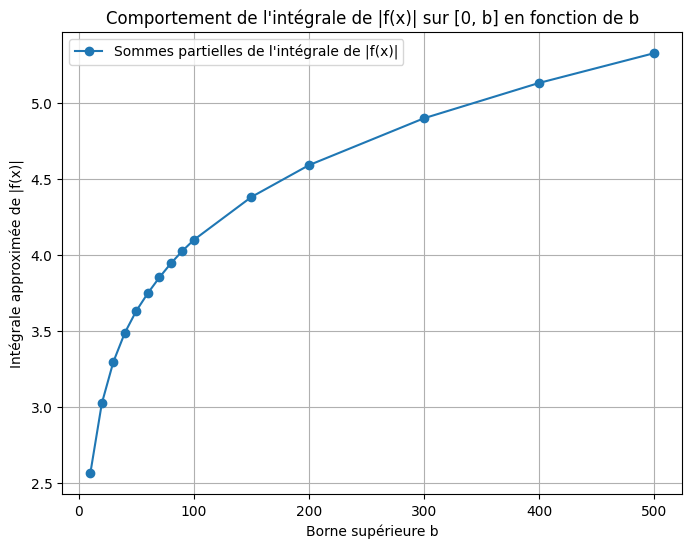

In [67]:
def f_abs(x):
    return np.where(x == 0, 1, np.abs(np.sin(x) / x))

def IntRecG_abs(f_abs, a, b, n):
    x_subdivision = np.linspace(a, b, n)
    pas_h = (b - a) / (n - 1)
    f_subdiv = f_abs(x_subdivision)
    return np.sum(f_subdiv) * pas_h

borne_sup = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500])  # Progression de la borne supérieure
erreur = np.zeros(len(borne_sup))

n = 1000

for i, b in enumerate(borne_sup):
    a = 0 
    Int_exp = IntRecG_abs(f_abs, a, b, n)
    erreur[i] = Int_exp

plt.figure(figsize=(8, 6))
plt.plot(borne_sup, erreur, "o-", label="Sommes partielles de l'intégrale de |f(x)|")
plt.xlabel("Borne supérieure b")
plt.ylabel("Intégrale approximée de |f(x)|")
plt.title("Comportement de l'intégrale de |f(x)| sur [0, b] en fonction de b")
plt.grid(True)
plt.legend()
plt.show()

Commentaires.

## Conlusion: 

Résumer le TP. Conclure sur la question du TP. 

Répondre ici.